# 1. mô tả các thống kê tổng quan về tập dữ liệu (số mẫu, số đặc trưng của 1 mẫu, kiểu dữ liệu của mỗi đặc trưng, số mẫu dữ liệu trống của mỗi đặc trưng,...)

In [99]:
# import thu vien
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
from scipy.stats import norm

In [100]:
data = pd.read_csv("/home/binbin/University/semester2_2122/Data_Science/Ck/Data.csv")
# data.drop(columns=['Unnamed: 12', 'Unnamed: 13'],inplace=True)


In [101]:
data.columns

Index(['title', 'address', 'area', 'price', 'number_bedroom', 'number_wc',
       'number_floor', 'direction', 'entrance', 'facade', 'number_parking',
       'id_estate'],
      dtype='object')

In [102]:
data.head()

,title,address,area,price,number_bedroom,number_wc,number_floor,direction,entrance,facade,number_parking,id_estate
0,Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...,"Vinhomes Smart City, Phường Trung Văn, Quận Na...",30.0,1.25,1.0,1.0,27.0,Đông bắc,30.0,30.0,3.0,3947348
1,Căn 2 pn full nội thất view hồ 10ha. công viên...,"Vinhomes Smart City, Phường Cầu Diễn, Quận Nam...",55.0,2.1,2.0,1.0,20.0,Đông bắc,50.0,5.0,3.0,3947371
2,"Duy nhất căn 2 ngủ tầng đẹp giá 1 tỷ 779triệu,...","Tecco Diamond, Xã Tứ Hiệp, Huyện Thanh Trì, Hà...",65.0,1.7,2.0,2.0,NaN,NaN,NaN,NaN,1.0,3946737
3,Nhận nhà ở ngay không lo trả lãi tại teccodiam...,"Tecco Diamond, Thị Trấn Văn Điển, Huyện Thanh ...",69.0,1.93,2.0,2.0,NaN,NaN,NaN,NaN,1.0,3946177
4,Chính chủ bán căn hộ chung cư citadines centra...,"Citadines Bình Dương, Phường An Thạnh, Thị Xã ...",114.0,3.05,3.0,2.0,16.0,NaN,50.0,NaN,NaN,3944714


In [103]:
data.isnull().sum()

title                0
address              0
area                 0
price                0
number_bedroom     365
number_wc          410
number_floor      1452
direction         1479
entrance          1938
facade            2130
number_parking    1572
id_estate            0
dtype: int64

In [104]:
# data["area"] = data["area"].astype(float)
data["price"] = data["price"].replace("Thỏa thuận", "0")
data["price"] = data["price"].astype(float)
data.describe()

,area,price,number_bedroom,number_wc,number_floor,entrance,facade,number_parking,id_estate
count,2680.000000,2680.000000,2315.000000,2270.000000,1228.000000,742.000000,550.000000,1108.000000,2.680000e+03
mean,105.427761,33.377684,2.001728,1.681057,21.376710,37.510782,204.294727,2.443141,3.902868e+06
std,1654.243275,270.004562,0.873600,0.719644,57.928099,69.977376,3126.666869,6.091846,1.098352e+05
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.623702e+06
25%,48.000000,0.900000,1.000000,1.000000,10.000000,20.000000,10.000000,1.000000,3.921051e+06
50%,63.000000,1.755000,2.000000,2.000000,20.000000,30.000000,30.000000,2.000000,3.938957e+06
75%,77.000000,2.530000,2.000000,2.000000,28.000000,35.000000,50.000000,4.000000,3.942594e+06
max,84000.000000,3628.000000,11.000000,11.000000,2012.000000,743.000000,73000.000000,200.000000,3.949548e+06


# 2. xuất ra các thống kê mô tả trực quan về các đặc trưng (ví dụ: dùng boxplot, histogram, scatter plot về độ tương quan,…).


- Do tuong quan giua cac dac trung

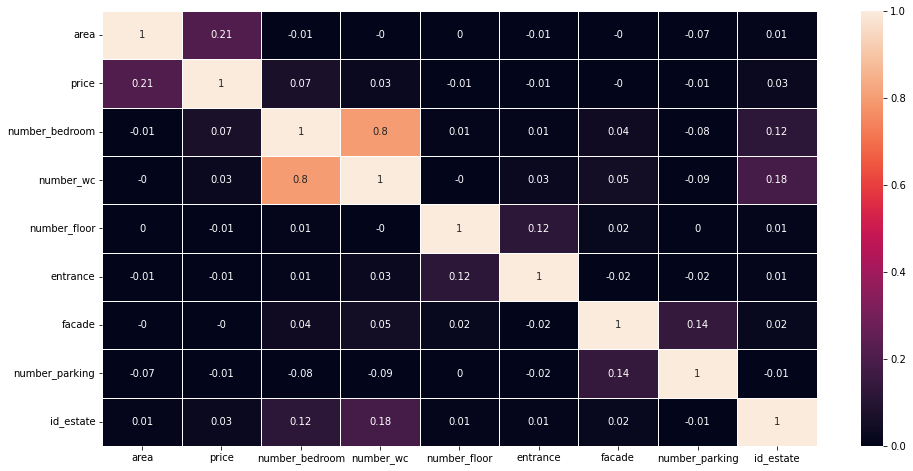

In [105]:
corr = data.corr().round(2)
mask = np.zeros_like(corr)
plt.subplots(figsize=(16, 8))
ax = sb.heatmap(corr, vmin=0, vmax=1, annot=True, linewidths=.5)

- phan bo cua dac trung

<AxesSubplot:xlabel='id_estate', ylabel='Count'>

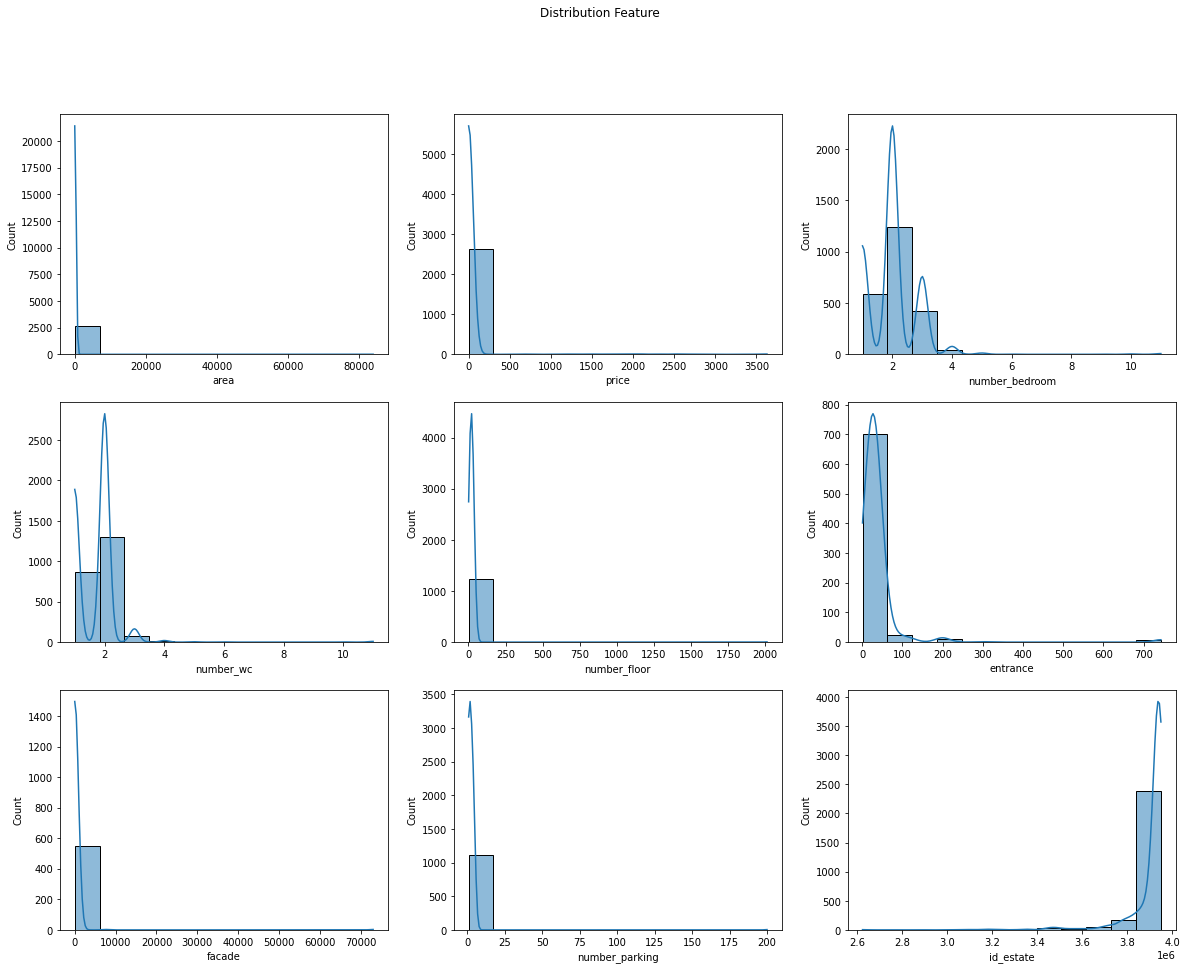

In [126]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

fig.suptitle('Distribution Feature')

sb.histplot(data= data["area"], bins= 12, kde= True, ax= axes[0, 0])
sb.histplot(data= data["price"], bins= 12, kde= True, ax= axes[0, 1])
sb.histplot(data= data["number_bedroom"], bins= 12, kde= True, ax= axes[0, 2])
sb.histplot(data= data["number_wc"], bins= 12, kde= True, ax= axes[1, 0])
sb.histplot(data= data["number_floor"], bins= 12, kde= True, ax= axes[1, 1])
sb.histplot(data= data["entrance"], bins= 12, kde= True, ax= axes[1, 2])
sb.histplot(data= data["facade"], bins= 12, kde= True, ax= axes[2, 0])
sb.histplot(data= data["number_parking"], bins= 12, kde= True, ax= axes[2, 1])
sb.histplot(data= data["id_estate"], bins= 12, kde= True, ax= axes[2, 2])


- quan he giua gia ca voi cac dac trung

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

fig.suptitle('Pokemon Stats by Generation')

sb.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')
sb.boxplot(ax=axes[0, 1], data=pokemon, x='Generation', y='Defense')
sb.boxplot(ax=axes[0, 2], data=pokemon, x='Generation', y='Speed')
sb.boxplot(ax=axes[1, 0], data=pokemon, x='Generation', y='Sp. Atk')
sb.boxplot(ax=axes[1, 1], data=pokemon, x='Generation', y='Sp. Def')
sb.boxplot(ax=axes[1, 2], data=pokemon, x='Generation', y='HP')